# Appendix
**A Case Study of Georgetown University: Was School Closure Appropriate During COVID-19?**

*Disclaimer: Not all visualizations and code were used for the Project Report.*

In [255]:
import numpy as np
import matplotlib.pyplot as plt

---
## Deterministic SIR Models

### Standard Model

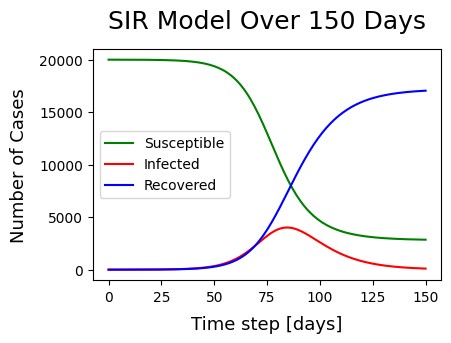

In [257]:
pop = 19999
s = pop
i = 1
r = 0
beta = 0.225
gamma = 0.1

s_standard_records = [s]
i_standard_records = [i]
r_standard_records = [r]

for j in range(150):
    s_prev = s
    i_prev = i
    r_prev = r
    N = s+i+r
    s = s_prev - (beta*i_prev*(s_prev/N))
    i = i_prev + (beta*i_prev*(s_prev/N)) - (gamma*i_prev) 
    r = r_prev + (gamma*i_prev)
    s_standard_records.append(s)
    i_standard_records.append(i)
    r_standard_records.append(r)
    

plt.figure(figsize=(4.5,3))
plt.plot(s_standard_records, color='green')
plt.plot(i_standard_records, color='red')
plt.plot(r_standard_records, color='blue')
plt.title('SIR Model Over 150 Days',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Time step [days]', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Susceptible','Infected','Recovered'])
plt.savefig('figures/basicSIR.png', bbox_inches='tight')
plt.show()

### Implementing a Vaccine

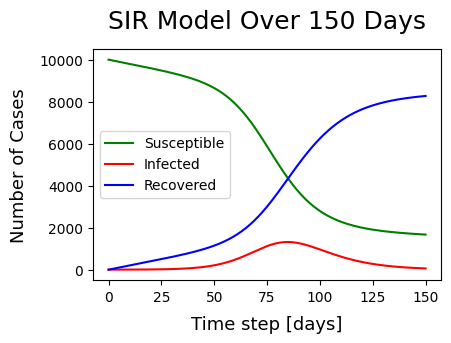

In [258]:
pop = 9999
s = pop
i = 1
r = 0
beta = 0.225
gamma = 0.1
v = 0.002

s_v_records = [s]
i_v_records = [i]
r_v_records = [r]

for j in range(150):
    s_prev = s
    i_prev = i
    r_prev = r
    N = s+i+r
    s = s_prev - (beta*i_prev*(s_prev/N)) - v*s_prev 
    i = i_prev + ((beta*i_prev*(s_prev/N)) - gamma*i_prev)
    r = r_prev + (gamma*i_prev + v*s_prev)
    s_v_records.append(s)
    i_v_records.append(i)
    r_v_records.append(r)
    

plt.figure(figsize=(4.5,3))
plt.plot(s_v_records, color='green')
plt.plot(i_v_records, color='red')
plt.plot(r_v_records, color='blue')
plt.title('SIR Model Over 150 Days',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Time step [days]', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Susceptible','Infected','Recovered'])
plt.savefig('figures/detSIR_Vaccine.png', bbox_inches="tight")
plt.show()

### Implementing quarantine

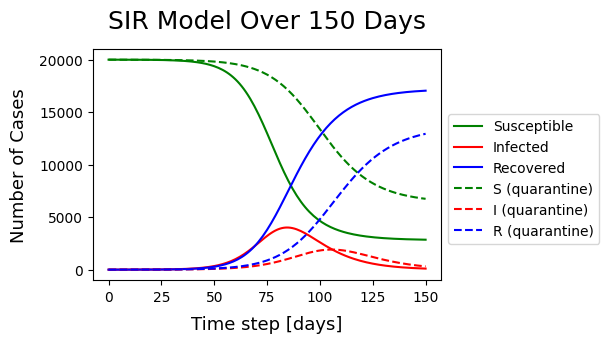

In [260]:
pop = 19999
s = pop
i = 1
r = 0
beta = 0.225
gamma = 0.1
#v = 0.002
delta = 0.035

sq_records = [s]
iq_records = [i]
rq_records = [r]

for j in range(150):
    s_prev = s
    i_prev = i
    r_prev = r
    N = s+i+r
    s = s_prev - (beta*i_prev*(s_prev/N))
    i = i_prev + (beta*i_prev*(s_prev/N)) - (gamma*i_prev) - delta*i_prev
    r = r_prev + (gamma*i_prev) + delta*i_prev
    sq_records.append(s)
    iq_records.append(i)
    rq_records.append(r)
    

plt.figure(figsize=(4.5,3))
plt.plot(s_standard_records, color='green')
plt.plot(i_standard_records, color='red')
plt.plot(r_standard_records, color='blue')
plt.plot(sq_records, color='green', linestyle='dashed')
plt.plot(iq_records, color='red', linestyle='dashed')
plt.plot(rq_records, color='blue', linestyle='dashed')
plt.plot
plt.title('SIR Model Over 150 Days',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Time step [days]', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Susceptible','Infected','Recovered', 'S (quarantine)', 'I (quarantine)', 'R (quarantine)'],
           bbox_to_anchor=(1, 0.75) )
plt.savefig('figures/detTradVsQuar.png', bbox_inches="tight")

plt.show()

### Comparing to Georgetown University Spring 2023

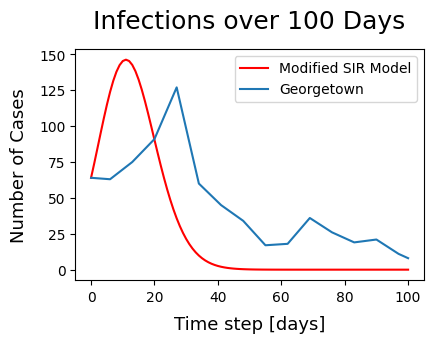

In [9]:
pop = 10000
i = 64
s = pop - i
r = 0
q = 0
beta = 0.5
gamma = 0.14
v = 0.03
delta = 0.2
mu = 0

s_records = [s]
i_records = [i]
r_records = [r]

for j in range(100):
    s_prev = s
    i_prev = i
    r_prev = r
    q_prev = q
    N = s+i+r
    s = s_prev - (beta*i_prev*(s_prev/N)) - v*s_prev 
    i = i_prev + (beta*i_prev*(s_prev/N)) - (gamma*i_prev) - delta*i_prev
    r = r_prev + (gamma*i_prev) + (v*s_prev) + delta*i_prev
    s_records.append(s)
    i_records.append(i)
    r_records.append(r)

y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
x = [0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 100]

plt.figure(figsize=(4.5,3))
#plt.plot(s_records, color='green')
plt.plot(i_records, color='red')
plt.plot(x, y)
#plt.plot(r_records, color='blue')
plt.title('Infections over 100 Days',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Time step [days]', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Modified SIR Model','Georgetown'])
plt.savefig('figures/detVSgtown.png', bbox_inches="tight")

plt.show()

---
## Stochastic Model With Random Walk (ATTEMPT 1)
**These models were not used in the progress report.**

They were simply used as a step in development.

In [537]:
def Step(agent, p_i, beta=0.025, lmbda=10, gamma=0.2):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            return 'I'
        else:
            return 'S'
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R'
        else:
            return 'I'
    else:
        return agent
    
index = 64
popsize = 20000
population = ['I']*index + ['S']*(popsize-index)
infected = population.count('I')
max_days = 100
s_records = [popsize-index]
i_records = [index]
r_records = [0]
beta = 0.015
gamma = 0.2
lmbda = 15

day = 0
while day < max_days:
    if day == 27:
        lmbda -= 5
    elif day == 62:
        lmbda += 10
    elif day == 69:
        lmbda -= 10
    prop_infected = infected/popsize
    for i, agent in enumerate(population):
        if agent != 'R':
            population[i] = Step(agent, prop_infected, beta = beta, 
                                 lmbda = lmbda, gamma=gamma)
    infected = population.count('I')
    s_records.append(population.count('S'))
    i_records.append(population.count('I'))
    r_records.append(population.count('R'))
    day += 1

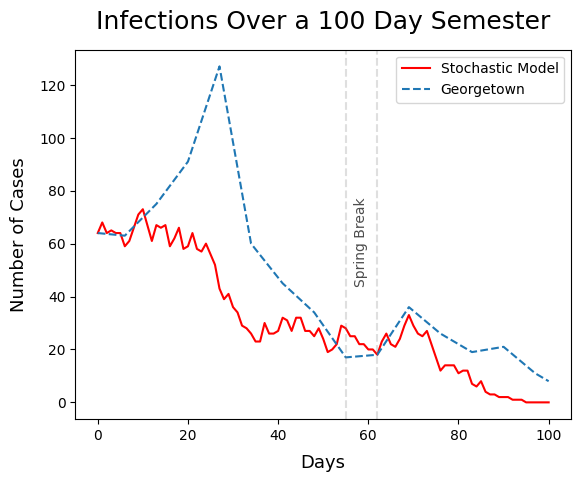

In [538]:
x = [0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 100]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 55
sb2x = 62
plt.figure()
#plt.plot(s_records, color='green')
plt.plot(i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.25)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.25)

#plt.plot(r_records, color='blue')
plt.title('Infections Over a 100 Day Semester',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.59, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}'
#plt.savefig(fig+'spbrk12', bbox_inches='tight')
plt.show()

### Adding Vaccine

In [495]:
def Step(agent, p_i, beta=0.025, lmbda=10, v=0.001, gamma=0.2):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            return 'I'
        elif np.random.random() < v:
            return 'R'
        else:
            return 'S'
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R'
        else:
            return 'I'
    else:
        return agent
    
index = 64
popsize = 20000
population = ['I']*index + ['S']*(popsize-index)
infected = population.count('I')
max_days = 100
s_records = [popsize-index]
i_records = [index]
r_records = [0]
beta = 0.015
gamma = 0.2
lmbda = 15
v = 0.01

day = 0
while day < max_days:
    if day == 27:
        lmbda -= 5
    elif day == 62:
        lmbda += 10
    elif day == 69:
        lmbda -= 10
    prop_infected = infected/popsize
    for i, agent in enumerate(population):
        if agent != 'R':
            population[i] = Step(agent, prop_infected, beta = beta, 
                                 lmbda = lmbda, v=v, gamma=gamma)
    infected = population.count('I')
    s_records.append(population.count('S'))
    i_records.append(population.count('I'))
    r_records.append(population.count('R'))
    day += 1

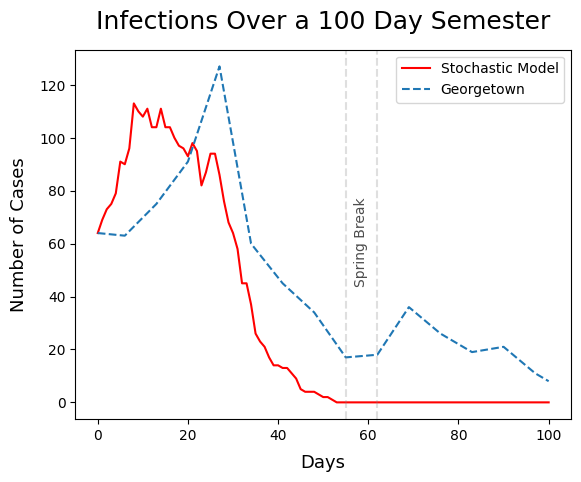

In [496]:
x = [0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 100]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 55
sb2x = 62
plt.figure()
#plt.plot(s_records, color='green')
plt.plot(i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.25)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.25)

#plt.plot(r_records, color='blue')
plt.title('Infections Over a 100 Day Semester',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.59, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}'
#plt.savefig(fig+'spbrk12', bbox_inches='tight')
plt.show()

### Adding Quarantine

In [551]:
def Step(agent, p_i, beta=0.025, lmbda=10, gamma=0.2, q=0.05):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            return 'I'
        else:
            return 'S'
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R'
        elif np.random.random() < q:
            return 'R'
        else:
            return 'I'
    else:
        return agent
    
index = 64
popsize = 20000
population = ['I']*index + ['S']*(popsize-index)
infected = population.count('I')
max_days = 100
s_records = [popsize-index]
i_records = [index]
r_records = [0]
beta = 0.015
gamma = 0.2
lmbda = 15
q=0.1

day = 0
while day < max_days:
    if day == 27:
        lmbda -= 5
    elif day == 62:
        lmbda += 10
    elif day == 69:
        lmbda -= 10
    prop_infected = infected/popsize
    for i, agent in enumerate(population):
        if agent != 'R':
            population[i] = Step(agent, prop_infected, beta = beta, 
                                 lmbda = lmbda, gamma=gamma)
    infected = population.count('I')
    s_records.append(population.count('S'))
    i_records.append(population.count('I'))
    r_records.append(population.count('R'))
    day += 1

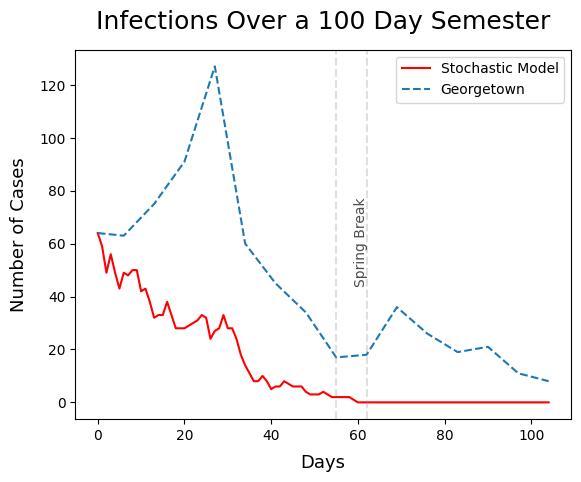

In [552]:
x = [0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 100]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 55
sb2x = 62
plt.figure()
#plt.plot(s_records, color='green')
plt.plot(i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.25)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.25)

#plt.plot(r_records, color='blue')
plt.title('Infections Over a 100 Day Semester',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.59, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}'
#plt.savefig(fig+'spbrk12', bbox_inches='tight')
plt.show()

---
## Correcting for Weekly Case Counts (ATTEMPT 2)
**These models WERE used in the report.**

They mimic the weekly data format from Georgetown University.

In [217]:
# Mean Squared Error
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

In [144]:
# To get the average of simulations
def Get_Average_Curve(records):
    avg = records[0]
    for record in records[1:]:
        avg = np.array(record) + avg
    avg = avg/(len(records))
    return avg

### Model 1

In [215]:
def Step1(agent, p_i, weekly_counter, beta=0.025, lmbda=10, gamma=0.2):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            weekly_counter += 1
            return 'I', weekly_counter
        else:
            return 'S', weekly_counter
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R', weekly_counter
        else:
            return 'I', weekly_counter
    else:
        return agent, weekly_counter
    

i_master = []
for j in range(500):
    index = 64
    popsize = 20000
    population = ['I']*index + ['S']*(popsize-index)
    infected = population.count('I')
    max_days = 103
    s_records = [popsize-index]
    i_records = [index]
    r_records = [0]
    weekly_i_records = [index]
    weekly_counter = index

    beta = 0.0117
    gamma = 0.16
    lmbda = 15

    day = 0
    while day < max_days:
        if day % 7 == 0:
            weekly_i_records.append(weekly_counter)
            weekly_counter = 0
        if day == 21:
            lmbda -= 5
        elif day == 56:
            lmbda += 10
        elif day == 63:
            lmbda -= 10
        prop_infected = infected/popsize
        for i, agent in enumerate(population):
            if agent != 'R':
                population[i], weekly_counter = Step1(agent, prop_infected, weekly_counter, beta = beta, 
                                     lmbda = lmbda, gamma=gamma)
        infected = population.count('I')
        s_records.append(population.count('S'))
        i_records.append(population.count('I'))
        r_records.append(population.count('R'))
        day += 1
    i_master.append(weekly_i_records)
    if j % 10 == 0: print(j) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [216]:
#print(i_master)
i_records = Get_Average_Curve(i_master)

In [222]:
gtown = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]

print(mse(gtown, i_records))
sum(i_records)

70.16720525000002


658.2459999999999

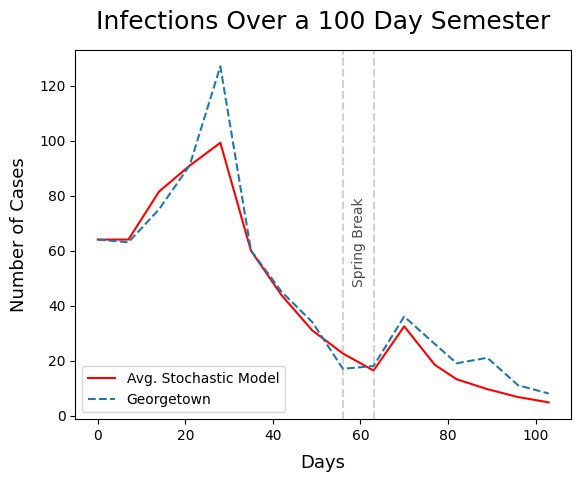

In [219]:
x = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 82, 89, 96, 103]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 56
sb2x = 63
plt.figure()
#plt.plot(s_records, color='green')
plt.plot(x, i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.35)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.35)

#plt.plot(r_records, color='blue')
plt.title('Infections Over a 100 Day Semester',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Cases', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Avg. Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.587, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}_Size='
#plt.savefig(fig+'weeklyMC500NewTiming', bbox_inches='tight')
plt.show()

### Model 2- Constant Quarantine

In [236]:
def Step2(agent, p_i, weekly_counter, beta=0.025, lmbda=10, gamma=0.2, q=0.1):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            weekly_counter += 1
            return 'I', weekly_counter
        else:
            return 'S', weekly_counter
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R', weekly_counter
        elif q and (np.random.random() < q):
                return 'R', weekly_counter
        else:
            return 'I', weekly_counter
    else:
        return agent, weekly_counter
    

i_master = []
for j in range(500):
    index = 64
    popsize = 20000
    population = ['I']*index + ['S']*(popsize-index)
    infected = population.count('I')
    max_days = 103
    s_records = [popsize-index]
    i_records = [index]
    r_records = [0]
    weekly_i_records = [index]
    weekly_counter = index

    beta = 0.0117
    gamma = 0.16
    lmbda = 15
    q=0.05


    day = 0
    while day < max_days:
        if day % 7 == 0:
            weekly_i_records.append(weekly_counter)
            weekly_counter = 0
        if day == 21:
            lmbda -= 5
        elif day == 56:
            lmbda += 10
        elif day == 63:
            lmbda -= 10
        prop_infected = infected/popsize
        for i, agent in enumerate(population):
            if agent != 'R':
                population[i], weekly_counter = Step2(agent, prop_infected, weekly_counter, beta = beta, 
                                                 lmbda = lmbda, gamma=gamma, q=q)
        infected = population.count('I')
        s_records.append(population.count('S'))
        i_records.append(population.count('I'))
        r_records.append(population.count('R'))
        day += 1
    i_master.append(weekly_i_records)
    if j % 10 == 0: print(j) 

0
10


In [237]:
weekly_i_records = Get_Average_Curve(i_master)

In [231]:
sum(weekly_i_records)

360.234

In [241]:
x = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 82, 89, 96, 103]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 56
sb2x = 63
plt.figure()
plt.plot(s_records, color='green')
plt.plot(x, weekly_i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.35)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.35)

plt.plot(r_records, color='blue')
plt.title('100 Day Semester With Quarantine',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Infections', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Avg. Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.587, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}_Size='
plt.savefig(fig+'QuarPolicysbTimingFixedMC500', bbox_inches='tight')
plt.show()

### Model 3- Strategized Quarantine

In [243]:
def Step(agent, p_i, weekly_counter, beta=0.025, lmbda=10, gamma=0.2, q=0.1):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            weekly_counter += 1
            return 'I', weekly_counter
        else:
            return 'S', weekly_counter
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R', weekly_counter
        elif q and (np.random.random() < q):
                return 'R', weekly_counter
        else:
            return 'I', weekly_counter
    else:
        return agent, weekly_counter
    

i_master = []
for j in range(500):
    index = 64
    popsize = 20000
    population = ['I']*index + ['S']*(popsize-index)
    infected = population.count('I')
    max_days = 103
    s_records = [popsize-index]
    i_records = [index]
    r_records = [0]
    weekly_i_records = [index]
    weekly_counter = index

    beta = 0.0117
    gamma = 0.16
    lmbda = 15
    q=0.05


    day = 0
    while day < max_days:
        if day % 7 == 0:
            weekly_i_records.append(weekly_counter)
            weekly_counter = 0
        if day == 21:
            lmbda -= 5
        elif day == 56:
            lmbda += 10
        elif day == 63:
            lmbda -= 10
        prop_infected = infected/popsize
        for i, agent in enumerate(population):
            if agent != 'R':
                if (day < 21) or (day >= 63 and day<= 70):
                    population[i], weekly_counter = Step2(agent, prop_infected, weekly_counter, beta = beta, 
                                                         lmbda = lmbda, gamma=gamma, q=q)
                else:
                    population[i], weekly_counter = Step2(agent, prop_infected, weekly_counter, beta = beta, 
                                                         lmbda = lmbda, gamma=gamma, q=False)
        infected = population.count('I')
        s_records.append(population.count('S'))
        i_records.append(population.count('I'))
        r_records.append(population.count('R'))
        day += 1
    i_master.append(weekly_i_records)
    if j % 10 == 0: print(j) 

0


In [230]:
weekly_i_records = Get_Average_Curve(i_master)

In [231]:
sum(weekly_i_records)

360.234

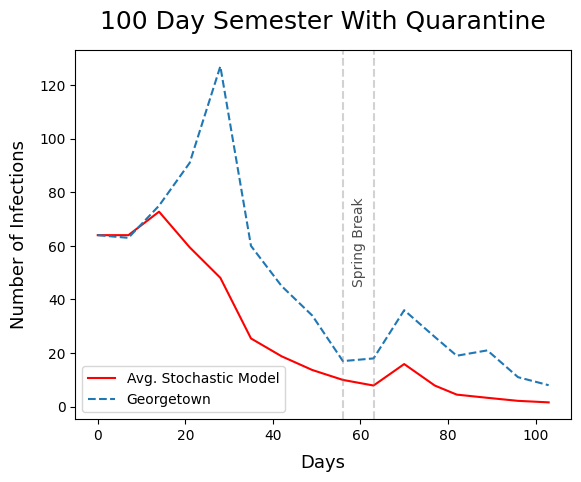

In [228]:
x = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 82, 89, 96, 103]
y = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]
sb1x = 56
sb2x = 63
plt.figure()
#plt.plot(s_records, color='green')
plt.plot(x, weekly_i_records, color='red')
plt.plot(x,y, linestyle='dashed')
plt.axvline(x = sb1x, linestyle = 'dashed', color = 'gray', alpha = 0.35)
plt.axvline(x = sb2x, linestyle = 'dashed', color = 'gray', alpha = 0.35)

#plt.plot(r_records, color='blue')
plt.title('100 Day Semester With Quarantine',fontdict={'fontsize':18}, pad = 15)
plt.xlabel('Days', labelpad=8, fontdict= {'fontsize':13})
plt.ylabel('Number of Infections', labelpad=8, fontdict= {'fontsize':13})
plt.legend(['Avg. Stochastic Model','Georgetown'])
plt.annotate('Spring Break', 
            xy=(10, 5),
            xycoords='data',
            xytext=(0.587, 0.60), 
            textcoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top',
            color = 'black', 
            alpha = 0.7,
            rotation=90)
fig = f'figures/stochSIR_B{str(round(beta,3)).split(".")[1]}_L{str(lmbda)}_R{str(round(gamma,3)).split(".")[1]}_POP{str(popsize)[:2]}_Size='
#plt.savefig(fig+'QuarPolicysbTimingFixedMC500', bbox_inches='tight')
plt.show()

### Parameter Testing

In [5]:
betas = [0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019]
gamma = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]

def Step(agent, p_i, weekly_counter, beta=0.025, lmbda=10, gamma=0.2):
    if agent == 'S':
        interactions = np.random.poisson(lmbda)
        infection_proba = np.random.binomial(interactions, p_i)*beta
        if np.random.random() < infection_proba:
            weekly_counter += 1
            return 'I', weekly_counter
        else:
            return 'S', weekly_counter
    elif agent == 'I':
        if np.random.random() < gamma:
            return 'R', weekly_counter
        else:
            return 'I', weekly_counter
    else:
        return agent, weekly_counter

def Get_Average_Curve(records):
    avg = records[0]
    for record in records[1:]:
        avg = np.array(record) + avg
    avg = avg/(len(records))
    return avg

def Run_MC(beta, gamma):
    master_i = []
    for x in range(10):
        index = 64
        popsize = 20000
        population = ['I']*index + ['S']*(popsize-index)
        infected = population.count('I')
        max_days = 103
        s_records = [popsize-index]
        i_records = [index]
        r_records = [0]
        weekly_i_records = [index]
        weekly_counter = index

        beta = beta
        gamma = gamma
        lmbda = 15

        day = 0
        while day < max_days:
            if day % 7 == 0:
                weekly_i_records.append(weekly_counter)
                weekly_counter = 0
            if day == 27:
                lmbda -= 5
            elif day == 62:
                lmbda += 10
            elif day == 69:
                lmbda -= 10
            prop_infected = infected/popsize
            for i, agent in enumerate(population):
                if agent != 'R':
                    population[i], weekly_counter = Step(agent, prop_infected, weekly_counter, beta = beta, 
                                         lmbda = lmbda, gamma=gamma)
            infected = population.count('I')
            s_records.append(population.count('S'))
            i_records.append(population.count('I'))
            r_records.append(population.count('R'))
            day += 1
        master_i.append(weekly_i_records)
    avg_curve = Get_Average_Curve(master_i)
    return avg_curve

In [6]:
combos = []
for beta in betas:
    for gamma in gamma:
        combos.append((beta,gamma))

In [7]:
avg_curves = {}
for i, combo in enumerate(combos):
    print(i)
    avg_curves[combo] = Run_MC(combo[0], combo[1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [9]:
gtown = [64, 63, 75, 91, 127, 60, 45, 34, 17, 18, 36, 26, 19, 21, 11, 8]

mse_dict = {}
for item in avg_curves.items():
    mse_dict[item[0]] = mse(gtown, item[1])

In [10]:
mse_dict

{(0.01, 0.1): 17935.142499999998,
 (0.01, 0.11): 5145.46125,
 (0.01, 0.12): 1512.93875,
 (0.01, 0.13): 347.44375,
 (0.01, 0.14): 217.57187499999995,
 (0.01, 0.15): 433.374375,
 (0.01, 0.16): 661.1887499999999,
 (0.01, 0.17): 959.0075,
 (0.01, 0.18): 925.505,
 (0.01, 0.19): 1251.2912499999998,
 (0.011, 0.1): 72432.71625,
 (0.011, 0.11): 27377.643125000002,
 (0.011, 0.12): 7621.489999999999,
 (0.011, 0.13): 3020.184375,
 (0.011, 0.14): 573.96625,
 (0.011, 0.15): 237.195625,
 (0.011, 0.16): 190.38437500000003,
 (0.011, 0.17): 348.46125,
 (0.011, 0.18): 672.2462499999999,
 (0.011, 0.19): 802.109375,
 (0.012, 0.1): 235537.259375,
 (0.012, 0.11): 98641.464375,
 (0.012, 0.12): 37124.92875,
 (0.012, 0.13): 13747.863125,
 (0.012, 0.14): 3881.825,
 (0.012, 0.15): 1191.2462500000001,
 (0.012, 0.16): 325.688125,
 (0.012, 0.17): 221.395625,
 (0.012, 0.18): 352.66999999999996,
 (0.012, 0.19): 303.28562500000004,
 (0.013, 0.1): 456633.5675,
 (0.013, 0.11): 266543.18062500004,
 (0.013, 0.12): 117410.4